<a href="https://colab.research.google.com/github/souvikjana9993/Mask_RCNN/blob/master/PROJ_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://drive.google.com/open?id=13VIZ0qgxhlyBQuWPJgm_bk0zfDjMXh9R

#Mask R-CNN instance segmentation with custom dataset in Google Colab
Jupyter notebook providing steps to train a **Matterport Mask R-CNN** model with custom dataset.

It runs in [Google Colab](https://colab.research.google.com/) using [Matterport framework](https://github.com/matterport/Mask_RCNN) with TensorFlow backend.

**Requirements are only dataset images and annotations file.**

**Colab Runtime type: Python3, GPU enabled.**

#Making Dataset
I generated dataset annotations with [VGG Image Annotator](http://www.robots.ox.ac.uk/~vgg/software/via/).

Notebook train a model for one class object detection. It is possible to slightly modify notebook to train model for multiple classes.

Before running notebook, we need to create dataset:


1.   Collect various pictures of objects to detect
3.   Create annotation files in VGG
4.   Create image.zip file having structure defined below
5.   Upload the zip file in your Google Drive

Zip file structure:
```
images.zip
|- "train" directory
  |- jpg image files of training data
  |- "via_region_data.json" annotations file of training data
|- "val" directory
  |- jpg image files of validation data
  |- "via_region_data.json" annotations file of validation data
```
Check mage.zip file as dataset example.

#Install required packages and download and extract dataset

In [1]:
%cd
!git clone --quiet https://github.com/matterport/Mask_RCNN.git
%cd ~/Mask_RCNN
!pip install -q PyDrive
!pip install -q -r requirements.txt
!python -q setup.py install
%cd ~/Mask_RCNN/dataset
import os
os.makedirs('dataset')
os.chdir('dataset')
import gdown
!gdown https://drive.google.com/uc?id=13VIZ0qgxhlyBQuWPJgm_bk0zfDjMXh9R
!unzip '/root/Mask_RCNN/dataset/dataset_prefinal_MASKED.zip'

/root
/root/Mask_RCNN
    100% |████████████████████████████████| 993kB 16.9MB/s 
    100% |████████████████████████████████| 204kB 21.1MB/s 
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating b

In [0]:
# ############# RUN THIS ONLY WHEN YOU ARE USING ONLY FOR DETECTION ####################################
# %cd '/'
# os.mkdir('logs')
# os.chdir('logs')
# #https://drive.google.com/uc?id=19_YuKlGQdphUFccTvs_BHmZt-hVheCMv
# !gdown https://drive.google.com/uc?id=19_YuKlGQdphUFccTvs_BHmZt-hVheCMv
# !unzip logs.zip

In [0]:
# import shutil
# shutil.copy('/model.py','/root/Mask_RCNN/mrcnn/')

#Edit settings file
*  find and replace occurrences of "balloon" and "Balloon" with name of your object
*  set epochs number


In [4]:
%cd ~/Mask_RCNN


!cp ~/Mask_RCNN/samples/balloon/balloon.py ./armas.py

!sed -i -- 's/balloon/gun/g' armas.py
!sed -i -- 's/Balloon/Gun/g' armas.py
!sed -i -- 's/epochs=100/epochs=20/g' armas.py

/root/Mask_RCNN


In [0]:
# %cd ~/Mask_RCNN/mrcnn
# !sed -i -- 's/BACKBONE = "resnet101"/BACKBONE = "resnet50"/g' config.py

#Train model
Pretrained weights options are COCO, ImageNet or a model trained before

In [5]:
%cd ~/Mask_RCNN

!python armas.py train --dataset=dataset/ --weights='coco'
#!python3 armas.py train --dataset=dataset/ --weights='/logs/gun20190319T0438/mask_rcnn_gun_0005.h5'

/root/Mask_RCNN
Using TensorFlow backend.
Weights:  coco
Dataset:  dataset/
Logs:  /logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_

In [0]:
######################## ZIP AND UPLOAD FOLDER TO DRIVE ########################

!pip install -U -q PyDrive

from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile
import os
import sys

zipname = 'logs'

def zipfolder(foldername, target_dir):            
    zipobj = zipfile.ZipFile(foldername + '.zip', 'w', zipfile.ZIP_DEFLATED)
    rootlen = len(target_dir) + 1
    for base, dirs, files in os.walk(target_dir):
        for file in files:
            fn = os.path.join(base, file)
            zipobj.write(fn, fn[rootlen:])

zipfolder(zipname, '/logs/')

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Create & upload a file text file.
file1 = drive.CreateFile()
file1.SetContentFile(zipname+".zip")
file1.Upload()

In [7]:
%cd ~/Mask_RCNN
import os
import cv2
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import glob
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import armas

# Root directory of the project
ROOT_DIR = os.getcwd()

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

custom_WEIGHTS_PATH = sorted(glob.glob("/logs/*/mask_rcnn_*.h5"))[-1]

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

config = armas.GunConfig()
custom_DIR = os.path.join(ROOT_DIR, "dataset")

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax
  
# Load validation dataset
dataset = armas.GunDataset()
dataset.load_gun(custom_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# load the last model you trained
# weights_path = model.find_last()[1]

# Load weights
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)

from importlib import reload # was constantly changin the visualization, so I decided to reload it instead of notebook
reload(visualize)

/root/Mask_RCNN


Using TensorFlow backend.



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

<module 'mrcnn.visualize' from '/root/Mask_RCNN/mrcnn/visualize.py'>

# RESULTS ON VALIDATION DATASET

image ID: gun.armas (2914).jpg (420) /root/Mask_RCNN/dataset/val/armas (2914).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  192.00000  max:  820.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool


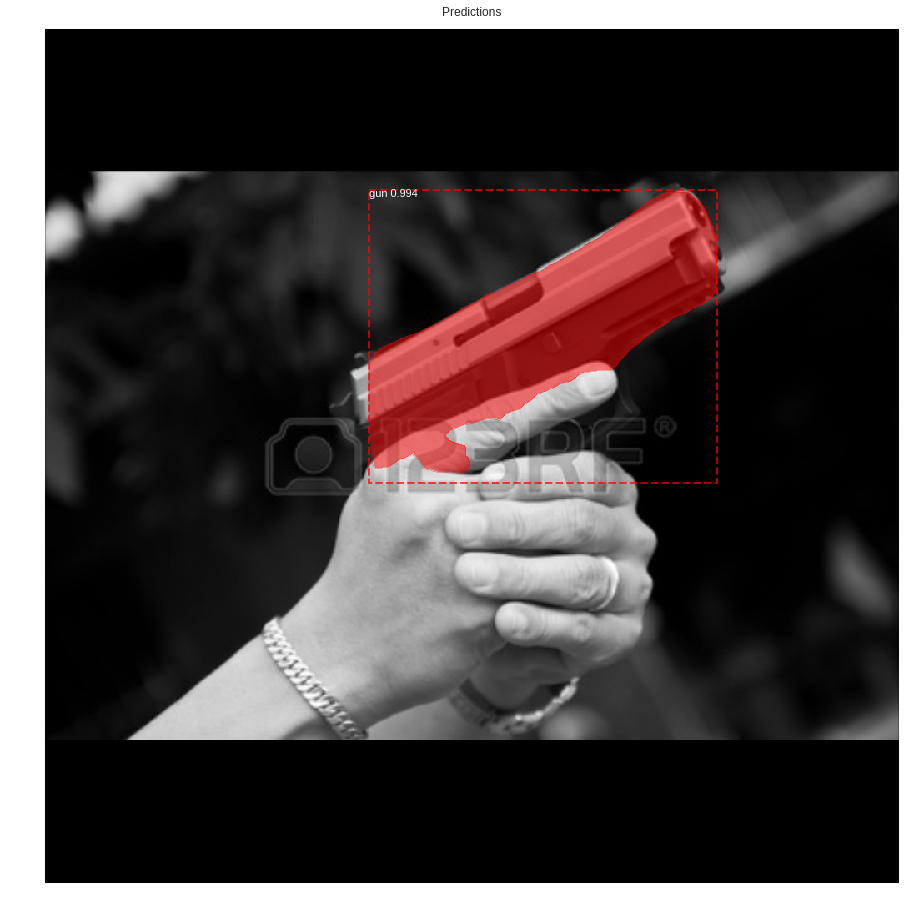

In [78]:
# image_id = random.choice(dataset.image_ids)
# for image_id in dataset.image_ids:
#   image, image_meta, gt_class_id, gt_bbox, gt_mask =\
#       modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
#   info = dataset.image_info[image_id]
#   #print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, dataset.image_reference(image_id)))

#   # Run object detection
#   results = model.detect([image], verbose=1)

#   # Display results
#   ax = get_ax(1)
#   r = results[0]
#   visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
#                               dataset.class_names, r['scores'], ax=ax,
#                               title="Predictions")
#   log("gt_class_id", gt_class_id)
#   log("gt_bbox", gt_bbox)
#   log("gt_mask", gt_mask)
  
  
  
  
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

# RESULTS ON TEST DATA

In [42]:
%cd ~/Mask_RCNN/samples
import os
#os.makedirs('sample')
os.chdir('sample')
#import gdown
#!gdown https://drive.google.com/uc?id=1T6q73cl2sDhwHsGWraNPWL8raec_643b
#!unzip '/root/Mask_RCNN/samples/sample/test_filesmasked_Rcnn.zip'
IMAGE_DIR = '/root/Mask_RCNN/samples/sample/test_files/'
class_names= ['BG', 'gun']

# import gdown
# !gdown https://drive.google.com/uc?id=1c6mNj-X8dXVs8_qaaNC1lTJcCazgYftR
#https://drive.google.com/open?id=1c6mNj-X8dXVs8_qaaNC1lTJcCazgYftR
#https://drive.google.com/open?id=


/root/Mask_RCNN/samples


In [0]:
IMAGE_DIR='/root/Mask_RCNN/dataset/val/'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


Processing 1 images
image                    shape: (120, 160, 3)         min:    7.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


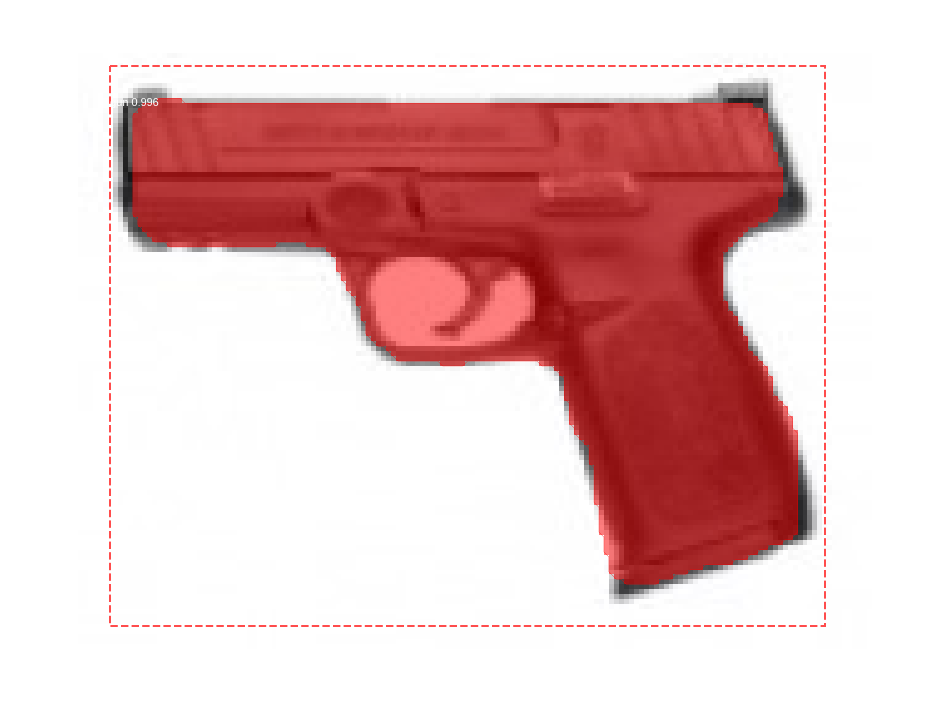

In [71]:
import os
import random
from scipy import misc
##run object detection
## Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = misc.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

# VISUALISING LOSS VALUES

In [6]:
LOG_DIR = '/logs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
! wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip -q ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://b66a62ff.ngrok.io


# VIDEO

In [0]:
%cd
!mkdir videos
!wget https://github.com/SihamTabik/Pistol-Detection-in-Videos/blob/master/video1.avi -P ./videos

/root
mkdir: cannot create directory ‘videos’: File exists
--2019-03-22 14:05:00--  https://github.com/SihamTabik/Pistol-Detection-in-Videos/blob/master/video1.avi
Resolving github.com (github.com)... 140.82.118.4, 140.82.118.3
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./videos/video1.avi’

video1.avi              [ <=>                ]  55.97K  --.-KB/s    in 0.01s   

2019-03-22 14:05:01 (5.47 MB/s) - ‘./videos/video1.avi’ saved [57317]



In [0]:
import shutil
shutil.copy('/armas.py','/root/Mask_RCNN')

'/root/Mask_RCNN/armas.py'

In [0]:
%cd ~/Mask_RCNN
!python3 armas.py splash --weights='/logs/gun20190322T0942/mask_rcnn_gun_0020.h5' --video='/root/Mask_RCNN/maskrcnn.mp4'

/root/Mask_RCNN
Using TensorFlow backend.
Weights:  /logs/gun20190322T0942/mask_rcnn_gun_0020.h5
Dataset:  None
Logs:  /logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, '

In [0]:
import gdown
!gdown https://drive.google.com/uc?id=1wApIyY5KyqTR-QEEN8Nk3zFBcnm2me8p

Downloading...
From: https://drive.google.com/uc?id=1wApIyY5KyqTR-QEEN8Nk3zFBcnm2me8p
To: /root/Mask_RCNN/maskrcnn.mp4
2.94MB [00:00, 91.8MB/s]
